In [8]:
%load_ext autoreload
%autoreload 2

import numpy as np
from PIL import Image as im
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
import cv2
from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:

def concat_2d(blocks, h, w):
    lines = []
    for y in range(h):
        images_in_line = []
        for x in range(w):
            img = blocks[w * y + x]
            images_in_line.append(img)
        line = np.hstack(images_in_line)
        lines.append(line)
    return np.vstack(lines)

def save_img_array(arr, filename):
    print(f'saved {filename} with shape {arr.shape}')
    im.fromarray(arr).save(filename)
    
(train_X, train_y), (test_X, test_y) = mnist.load_data()
digits = np.concatenate([train_X, test_X])

In [18]:
def test(_digits, input_file, output_file):
    digits = _digits.copy()
    image = cv2.imread(input_file)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # edged = cv2.Canny(gray, 20, 120)
    # contours, hierarchy = cv2.findContours(edged,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    # countours_only = np.zeros_like(image)
    # cv2.drawContours(countours_only, contours, -1, (255,255,255), 10)
    # gray = cv2.cvtColor(countours_only, cv2.COLOR_BGR2GRAY)

    h, w = gray.shape
    new_h = 2480  # Height in pixel for the A4 print format w 300px per inch density  
    scale = new_h / h
    new_w = int(w * scale)
    gray = cv2.resize(gray, dsize=(new_w, new_h), interpolation=cv2.INTER_CUBIC)
    plt.imshow(gray)
    h, w = gray.shape
    mnist_h = h // 28
    mnist_w = w // 28
    h = mnist_h * 28
    w = mnist_w * 28
    print(w, h, scale)

    matching_digits = []

    mnist_coords = []
    for my in range(mnist_h):
        for mx in range(mnist_w):
            mnist_coords.append((mx, my))

    excluded = np.zeros(len(digits))
    for mx, my in tqdm(mnist_coords):
        block = gray[my * 28 : (my+1) * 28, mx * 28: (mx + 1) * 28]
        matching_idx = min(
            range(len(digits)), 
            key=lambda idx: np.linalg.norm(block - digits[idx]) + excluded[idx]
        )
        matching_digits.append(digits[matching_idx])
        excluded[matching_idx] = 2**24
        # digits = np.delete(digits, matching_idx, axis=0)

    big_image = concat_2d(matching_digits, mnist_h, mnist_w)
    save_img_array(big_image, output_file)

4676 2464 2.440944881889764


100%|██████████| 14696/14696 [1:55:08<00:00,  2.13it/s]


saved outputs/6_scale2.png with shape (2464, 4676)


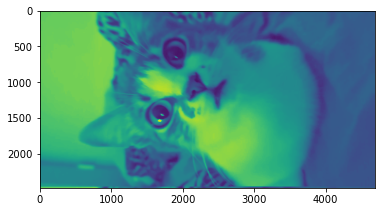

In [22]:
test(digits, input_file='images/6.jpg', output_file='outputs/6_scale2.png')

1288 2464 1.2916666666666667


100%|██████████| 4048/4048 [34:28<00:00,  1.96it/s]


saved outputs/7_scale.png with shape (2464, 1288)


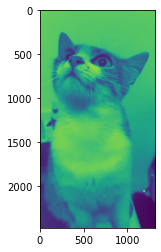

In [20]:
test(digits, input_file='images/7.jpg', output_file='outputs/7_scale.png')

3304 2464 1.6145833333333333


100%|██████████| 10384/10384 [1:23:24<00:00,  2.07it/s]


saved outputs/8_scale.png with shape (2464, 3304)


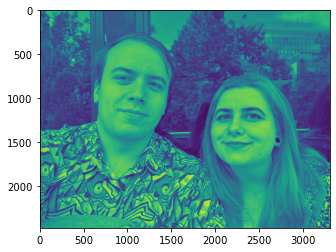

In [21]:
test(digits, input_file='images/8.jpg', output_file='outputs/8_scale.png')